In [1]:
import json
from pathlib import Path

model = "FSRS-4.5"

users = []
rmse = []
sizes = []
parameters = []
result_dir = Path(f"../result/{model}")
result_files = result_dir.glob("*.json")
for result_file in result_files:
    with open(result_file, "r") as f:
        result = json.load(f)
        users.append(result["user"])
        rmse.append(result[model]["RMSE(bins)"])
        sizes.append(result["size"])
        parameters.append(result["weights"])

In [2]:
import pandas as pd

df = pd.DataFrame({
    "user": users,
    "size": sizes,
    "rmse": rmse,
    "parameters": parameters
})

In [7]:
df[df["size"]>10000].copy().sort_values(by="rmse", ascending=False).head(20)

,user,size,rmse,parameters,group
2324,17085,10330,0.467395,"[0.1, 0.1, 0.1, 0.1, 4.855, 1.4278, 0.9663, 0....",11000
13020,3749,65435,0.434132,"[0.1, 1.0764, 1.6633, 5.7445, 4.81, 1.1079, 1....",65000
4628,8087,38510,0.384628,"[0.1, 0.1059, 0.2776, 7.9731, 4.4848, 0.3755, ...",39000
2187,15145,11990,0.366514,"[0.1, 0.8392, 0.8392, 0.8392, 5.8787, 1.9773, ...",11000
15979,11962,35550,0.353935,"[0.1326, 0.2315, 1.7415, 6.6853, 5.1874, 1.190...",35000
16159,19076,20525,0.315691,"[0.1, 0.1, 0.1, 0.3119, 6.0002, 1.9182, 1.1402...",21000
2993,15693,118000,0.313080,"[0.218, 1.2122, 3.5297, 7.9731, 4.3624, 0.3017...",119000
17739,3915,11475,0.310802,"[1.172, 5.0247, 44.6036, 100.0, 5.0199, 1.1186...",11000
11013,4238,364340,0.294463,"[0.921, 1.5773, 3.5353, 3.5353, 9.9999, 0.1052...",365000
9520,6586,19345,0.292666,"[0.612, 0.738, 1.4889, 5.0658, 5.1655, 0.5313,...",19000


In [4]:
width = 2000

# 定义一个函数，用于计算样本量所在的区间
def compute_interval(x, interval_length=width):
    return int((x // interval_length + 0.5) * interval_length)

# 应用这个函数到样本量列，创建一个新的区间列
df['group'] = df['size'].apply(compute_interval)

# 然后，我们可以按照这个区间列分组，并计算每组的平均误差
interval_error = df.groupby('group')['rmse'].mean().sort_index().reset_index()

print(interval_error)

       group      rmse
0       1000  0.131991
1       3000  0.090794
2       5000  0.079051
3       7000  0.070748
4       9000  0.067638
..       ...       ...
258  1069000  0.022115
259  1139000  0.037460
260  1341000  0.019849
261  1487000  0.035118
262  1493000  0.019416

[263 rows x 2 columns]


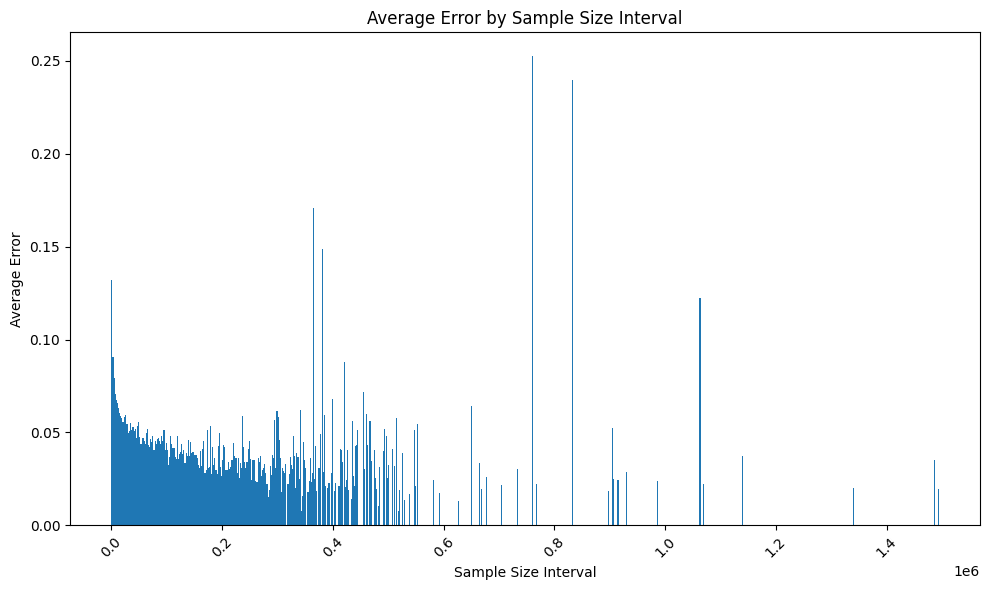

In [5]:
import matplotlib.pyplot as plt

# 绘制柱状图
plt.figure(figsize=(10, 6))  # 设置图的大小
plt.bar(interval_error['group'], interval_error['rmse'], width=width)  # 绘制柱状图

# 添加标题和轴标签
plt.title('Average Error by Sample Size Interval')
plt.xlabel('Sample Size Interval')
plt.ylabel('Average Error')

# 优化x轴标签显示
plt.xticks(rotation=45)  # 旋转x轴标签，避免重叠

# 显示图形
plt.tight_layout()  # 调整布局以适应图形
plt.show()

In [6]:
3749

3749